In [5]:
import librosa
import numpy as np
import librosa.display

In [44]:
audio_path = "data/-6_dB_slider/slider/id_00/abnormal/00000005.wav"
audio, sample_rate = librosa.load(audio_path)

In [46]:
import IPython.display as ipd
ipd.Audio(audio_path)

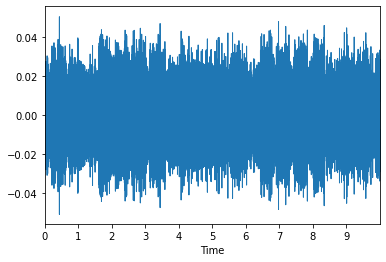

In [24]:
librosa.display.waveplot(audio, sr=sample_rate)

In [40]:
audio

array([-0.00450214, -0.00463825, -0.00280949, ..., -0.00916571,
       -0.00874133, -0.00748187], dtype=float32)

In [26]:
audio.shape

(220500,)

In [27]:
sample_rate

22050

In [42]:
import matplotlib.pyplot as plt

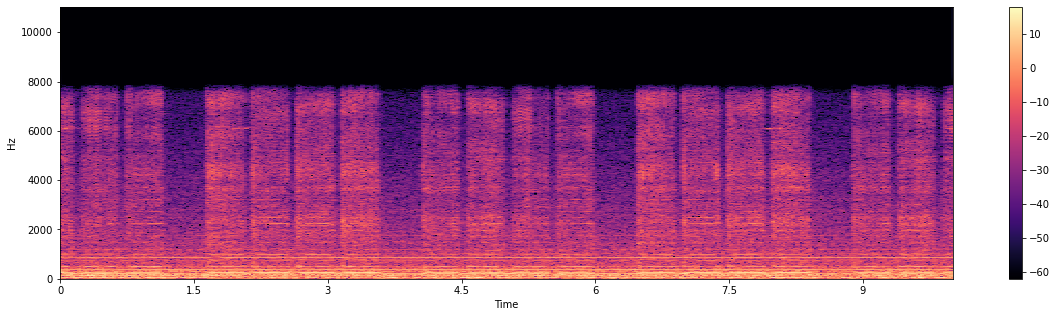

In [45]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [49]:
mfccs = librosa.feature.mfcc(audio, sr=sample_rate, n_mfcc=1)
print(mfccs.shape)

(1, 431)


In [50]:
Xdb.shape

(1025, 431)

In [51]:
mfccs

array([[-349.59567, -350.4189 , -348.1085 , -348.51416, -355.52893,
        -362.5297 , -384.7804 , -417.85004, -421.7002 , -408.83655,
        -385.85806, -365.1616 , -361.29733, -355.9547 , -346.8063 ,
        -354.65027, -353.3826 , -340.94626, -343.35718, -362.65073,
        -370.33948, -365.5031 , -367.5798 , -366.32928, -369.81296,
        -366.49814, -365.04413, -374.00574, -405.5456 , -422.46332,
        -422.14694, -401.05142, -364.57578, -356.58997, -362.57922,
        -367.1057 , -363.8551 , -366.38412, -373.1245 , -370.37634,
        -365.92657, -362.0443 , -361.76892, -358.94357, -357.06567,
        -351.1386 , -351.5093 , -358.59073, -363.50928, -382.3509 ,
        -412.57996, -423.8696 , -428.52798, -431.32642, -434.57205,
        -433.23035, -429.9301 , -433.38834, -434.2882 , -437.05725,
        -436.07486, -433.76642, -433.59158, -431.20288, -434.81552,
        -433.63287, -430.73428, -431.55994, -426.99103, -415.9793 ,
        -356.8282 , -324.26495, -318.46286, -316

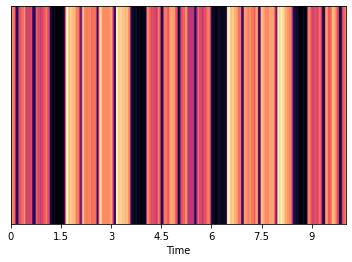

In [52]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

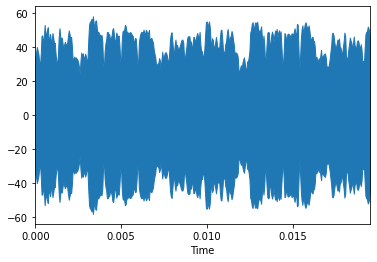

In [35]:
librosa.display.waveplot(mfccs[5], sr=sample_rate)

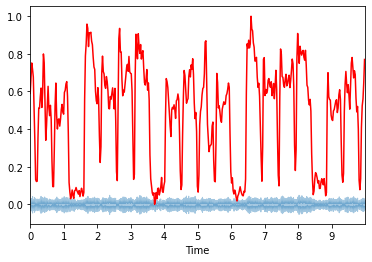

In [48]:
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sample_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(audio, axis=0):
    return sklearn.preprocessing.minmax_scale(audio, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(audio, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
